# 1. Pipeline

In [1]:
# 와인 데이터 사용
import pandas as pd

red_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial"+"/master/dataset/winequality-red.csv"
white_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial"+"/master/dataset/winequality-white.csv"


red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')



# 데이터 합치기
red_wine['color'] = 1
white_wine['color'] = 0

wine = pd.concat([red_wine, white_wine])

In [2]:
X = wine.drop(['color'], axis=1)
y = wine['color']

### 레드/화이트 와인 분류기 동작 프로세스
$$
StandardScaler() -> test\_train\_split() -> DecisionTreeClassifier()
$$

- 여기서 test_train)split() 은 Pipeline 내부가 아니다.

### 위의 Pipeline을 코드로 구현

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

estimators = [('scaler', StandardScaler()),
             ('clf', DecisionTreeClassifier())]

pipe = Pipeline(estimators)

In [4]:
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier())])

In [5]:
pipe.steps

[('scaler', StandardScaler()), ('clf', DecisionTreeClassifier())]

In [6]:
pipe.steps[0]

('scaler', StandardScaler())

In [7]:
pipe.steps[1]

('clf', DecisionTreeClassifier())

In [8]:
pipe[0]

StandardScaler()

In [9]:
pipe['scaler']

StandardScaler()

### Pipeline 단계별 파라미터 지정하기
- 스탭이름 + **언더바 두개** + 속성이름

In [10]:
pipe.set_params(clf__max_depth=2)
pipe.set_params(clf__random_state=13)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [11]:
pipe.steps

[('scaler', StandardScaler()),
 ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))]

### Pipeline을 이용한 분류기 구성

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [13]:
# 정확성 확인

from sklearn.metrics import accuracy_score

y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.9657494708485664
Test Acc :  0.9576923076923077


### 모델 구조 확인

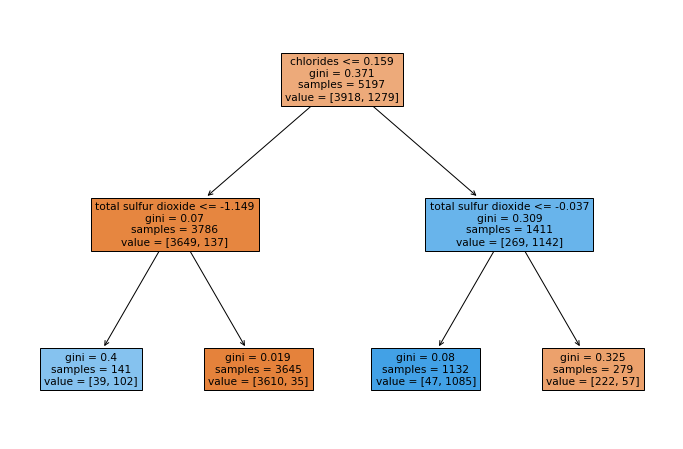

In [23]:
import matplotlib.pyplot as plt
import sklearn.tree as tree

plt.figure(figsize=(12, 8))
tree.plot_tree(pipe['clf'], feature_names=X.columns, filled=True);